# 2.4 微分計算

## 2.4.2 多変数関数の微分

In [1]:
using Pkg
Pkg.add("PyPlot")
Pkg.build("PyPlot")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1fc929f47d7c151c839c5fc1375929766fb8edcc/build.log`


In [2]:
using PyPlot

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/hk/.julia/packages/PyPlot/XaELc/src/init.jl:118
┌ Info: Installing PyQt5 via the Conda pyqt package...
└ @ PyCall /Users/hk/.julia/packages/PyCall/7a7w0/src/PyCall.jl:711
┌ Info: Running `conda install -y pyqt` in root environment
└ @ Conda /Users/hk/.julia/packages/Conda/x2UxR/src/Conda.jl:127

PackagesNotFoundError: The following packages are not available from current channels:

  - pyqt

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
# グラフを可視化する際の解像度
L = 10

# f₂(x)を可視化する範囲
xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)

# 2変数関数の定義
f₂(x) = -(x .+ 1)'*(x .- 1)

# 2変数関数の勾配
∇f₂(x) = -2x

∇f₂ (generic function with 1 method)

In [4]:
[f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]'

10×10 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0       0.395062  0.691358  0.888889  …  0.691358  0.395062  0.0
 0.395062  0.790123  1.08642   1.28395      1.08642   0.790123  0.395062
 0.691358  1.08642   1.38272   1.58025      1.38272   1.08642   0.691358
 0.888889  1.28395   1.58025   1.77778      1.58025   1.28395   0.888889
 0.987654  1.38272   1.67901   1.87654      1.67901   1.38272   0.987654
 0.987654  1.38272   1.67901   1.87654   …  1.67901   1.38272   0.987654
 0.888889  1.28395   1.58025   1.77778      1.58025   1.28395   0.888889
 0.691358  1.08642   1.38272   1.58025      1.38272   1.08642   0.691358
 0.395062  0.790123  1.08642   1.28395      1.08642   0.790123  0.395062
 0.0       0.395062  0.691358  0.888889     0.691358  0.395062  0.0

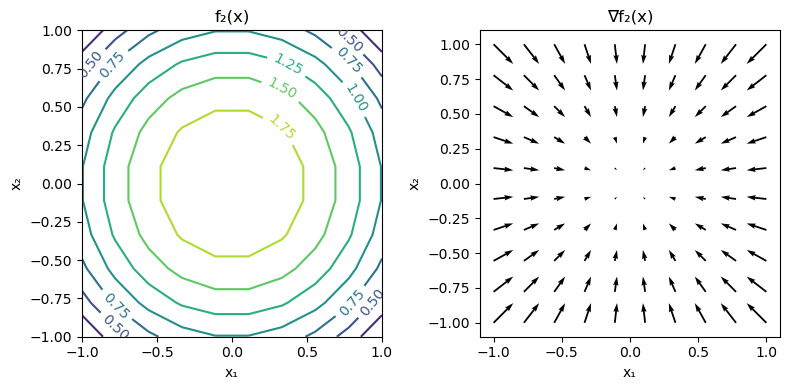

In [11]:
fig, axes = subplots(1, 2, figsize=(8,4))

# 関数の等高線図の可視化
cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline=true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

# 勾配ベクトルの計算と可視化
vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]
axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', L, 1), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()